# Proyek KASDD Ganjil 2023/24 : Valorant Pro Matches
**Nama Kelompok**: TSTKPlusSatu

| Nama                          | NPM         | Kelas |
|-------------------------------|-------------|-------|
| Kevin Alexander               | 2106705026  | B     |
| Emir Shamsuddin Fadhlurrahman | 2106632541  | F     |
| Michael Christlambert Sinanta | 2106750414  | F     |
| Vinsen Wijaya                 | 2106637776  | F     |


**Cara Menjalankan Program:**

1. Siapkan file yang dibutuhkan dalam satu folder.
```
    Folder
    │
    └─── tk-kasdad.ipynb
    │   
    └─── games.csv
    │   
    └─── matches.csv
    │   
    └─── scores.csv
    │   
    └─── agent_encode.csv
```
* Dataset dapat diakses pada [link](https://drive.google.com/drive/folders/1Fd8342inMJjF46Df7aMlo51qEvtWfl3s) ini
2. Jalankan program dengan menekan "Run All"
3. Program dapat berhasil dijalankan.

## Install Library

In [176]:
%pip install pandas numpy seaborn scipy plotly matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Import Library

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

## Data Preprocessing

In [178]:
df_games = pd.read_csv('./games.csv')
df_matches = pd.read_csv('./matches.csv')
df_scores = pd.read_csv('./scores.csv')
df_encode = pd.read_csv('./agent_encode.csv')

In [179]:
df_games

,No,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds
0,0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,0.0,5.0,13.0,13,4.0,2.0,4.0,10.0,7
1,1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,2,3.0,3.0,5.0,4.0,2,2.0,0.0,4.0,9.0,13
2,2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,2.0,5.0,12.0,13,2.0,2.0,6.0,11.0,8
3,3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,1,2.0,2.0,4.0,11.0,13,4.0,1.0,2.0,12.0,6
4,4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,1,4.0,2.0,3.0,13.0,13,3.0,3.0,4.0,12.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12956,15883,6,10,Haven,4,11,smoke,Obey Alliance,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12957,15884,8,12,Bind,10,8,Highground,JSD,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12958,15885,4,8,Haven,4,6,smoke,Orgless,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12959,15886,3,7,Split,4,5,smoke,Last Minute Heroes,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [180]:
df_scores

,No,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,0,60894,8419.0,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,1,60894,466.0,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,2,60894,3712.0,diaamond,Boos,sova,226.0,17.0,9.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,3,60894,5099.0,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,4,60894,3983.0,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128774,157934,13,24.0,Gover,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128775,157935,13,25.0,Jack1,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128776,157936,13,26.0,Rewind,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128777,157937,13,27.0,Woo1y,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [182]:
df_winner = df_games[['GameID', 'Team1', 'Team2', 'Winner']]
df_winner

,GameID,Team1,Team2,Winner
0,60894,Booster Seat Gaming,Pho Real,1
1,60895,Booster Seat Gaming,Pho Real,2
2,60896,Booster Seat Gaming,Pho Real,1
3,60924,Bjor's Kittens,Mugiwara,1
4,60925,Bjor's Kittens,Mugiwara,1
...,...,...,...,...
12956,6,smoke,Obey Alliance,2
12957,8,Highground,JSD,2
12958,4,smoke,Orgless,2
12959,3,smoke,Last Minute Heroes,2


In [183]:
df_composition = df_scores[['GameID', 'TeamAbbreviation', 'Agent']]
df_composition.head(10)

,GameID,TeamAbbreviation,Agent
0,60894,Boos,jett
1,60894,Boos,chamber
2,60894,Boos,sova
3,60894,Boos,viper
4,60894,Boos,skye
5,60894,Pho,astra
6,60894,Pho,sova
7,60894,Pho,chamber
8,60894,Pho,skye
9,60894,Pho,viper


In [184]:
cek_null(df_composition)

                  Total   Percent
Agent              4100  3.183749
TeamAbbreviation   2016  1.565473


Ada missing values pada Agent. Sulit untuk memberikan nilai pada missing values tersebut, karena kita harus menjaga constraint bahwa pada setiap tim di setiap game, tidak boleh ada agent yang sama. Oleh karena itu, kita lakukan drop.

In [185]:
df_composition_dropped = df_composition.dropna()
df_composition_dropped

,GameID,TeamAbbreviation,Agent
0,60894,Boos,jett
1,60894,Boos,chamber
2,60894,Boos,sova
3,60894,Boos,viper
4,60894,Boos,skye
...,...,...,...
127989,221,WP,sage
127990,221,WP,phoenix
127991,221,WP,cypher
127992,221,WP,sova


In [186]:
df_composition[df_composition['TeamAbbreviation'].isna()]

,GameID,TeamAbbreviation,Agent
33,60924,NaN,sage
44,60925,NaN,cypher
145,60882,NaN,astra
157,60883,NaN,astra
223,60862,NaN,sova
...,...,...,...
128774,13,NaN,NaN
128775,13,NaN,NaN
128776,13,NaN,NaN
128777,13,NaN,NaN


In [187]:
df_merged = df_winner.merge(df_composition, left_on='GameID', right_on='GameID')
df_merged

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
128719,13,Dignitas,JSD,2,NaN,NaN
128720,13,Dignitas,JSD,2,NaN,NaN
128721,13,Dignitas,JSD,2,NaN,NaN
128722,13,Dignitas,JSD,2,NaN,NaN


Di bawah, terlihat bahwa terdapat data game yang jumlah pemainnya kurang dari 10 orang. Padahal dalam suatu permainan, jumlah pemain haruslah 10. Kemungkinan itu adalah data yang corrupt. Karena hanya 1.5% (199 / 12952), maka kita dapat melakukan drop.

In [188]:
df_merged.groupby('GameID').size()[df_merged.groupby('GameID').size() != 10]

GameID
3        5
4        5
86       6
87       6
89       6
        ..
59414    5
59415    5
60441    9
60607    9
60621    9
Length: 199, dtype: int64

In [189]:
df_merged.groupby('GameID').size()

GameID
3         5
4         5
6        10
8        10
13       10
         ..
60913    10
60921    10
60922    10
60924    10
60925    10
Length: 12952, dtype: int64

In [190]:
games_10_players = df_merged.groupby('GameID').size()[df_merged.groupby('GameID').size() == 10].index
df_merged_games_10 = df_merged[df_merged['GameID'].isin(games_10_players)]
df_merged_games_10

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
128719,13,Dignitas,JSD,2,NaN,NaN
128720,13,Dignitas,JSD,2,NaN,NaN
128721,13,Dignitas,JSD,2,NaN,NaN
128722,13,Dignitas,JSD,2,NaN,NaN


In [191]:
cek_null(df_merged_games_10)

                  Total   Percent
Agent              3923  3.076139
TeamAbbreviation   1969  1.543950


In [192]:
df_agent_exist = df_merged_games_10[df_merged_games_10['Agent'].notna()]
df_agent_exist

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
127934,221,NeverEndingStory,Worst Players,2,WP,sage
127935,221,NeverEndingStory,Worst Players,2,WP,phoenix
127936,221,NeverEndingStory,Worst Players,2,WP,cypher
127937,221,NeverEndingStory,Worst Players,2,WP,sova


In [193]:
df_agent_exist.groupby('GameID').size()[df_agent_exist.groupby('GameID').size() != 10]

GameID
1618    9
2000    8
dtype: int64

Wait, mending yang soal match == 10 itu belakangan aja.. apus dulu yang gaada Agent, etc

In [194]:
df_agent_exist = df_merged[df_merged['Agent'].notna()]
df_agent_exist

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
127934,221,NeverEndingStory,Worst Players,2,WP,sage
127935,221,NeverEndingStory,Worst Players,2,WP,phoenix
127936,221,NeverEndingStory,Worst Players,2,WP,cypher
127937,221,NeverEndingStory,Worst Players,2,WP,sova


In [195]:
cek_null(df_agent_exist)

                  Total   Percent
TeamAbbreviation   1757  1.409841


In [196]:
df_team_exist = df_agent_exist[df_agent_exist['TeamAbbreviation'].notna()]
df_team_exist

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
127934,221,NeverEndingStory,Worst Players,2,WP,sage
127935,221,NeverEndingStory,Worst Players,2,WP,phoenix
127936,221,NeverEndingStory,Worst Players,2,WP,cypher
127937,221,NeverEndingStory,Worst Players,2,WP,sova


In [197]:
games_with_10_players = df_team_exist.groupby('GameID').size()[df_team_exist.groupby('GameID').size() == 10].index
df_valid_game = df_team_exist[df_team_exist['GameID'].isin(games_with_10_players)]
df_valid_game

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
127934,221,NeverEndingStory,Worst Players,2,WP,sage
127935,221,NeverEndingStory,Worst Players,2,WP,phoenix
127936,221,NeverEndingStory,Worst Players,2,WP,cypher
127937,221,NeverEndingStory,Worst Players,2,WP,sova


In [198]:
cek_null(df_valid_game)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [199]:
df_valid_game

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
127934,221,NeverEndingStory,Worst Players,2,WP,sage
127935,221,NeverEndingStory,Worst Players,2,WP,phoenix
127936,221,NeverEndingStory,Worst Players,2,WP,cypher
127937,221,NeverEndingStory,Worst Players,2,WP,sova


Coba pisah jadi 5-5, terus ambil yang ganjil -> set 1, genap -> set 2.

In [200]:
df_odd = df_valid_game[df_valid_game.reset_index().index % 10 < 5]
df_even = df_valid_game[df_valid_game.reset_index().index % 10 >= 5]

odd_team_name = df_odd[['Team1', 'TeamAbbreviation']].rename(columns={'Team1': 'Team'}, inplace=False)
even_team_name = df_even[['Team2', 'TeamAbbreviation']].rename(columns={'Team2': 'Team'}, inplace=False)

df_team_abbrev_pair = pd.concat([odd_team_name, even_team_name], axis=0)
df_team_abbrev_pair = df_team_abbrev_pair.groupby(['Team', 'TeamAbbreviation']).size()

df_team_abbrev_pair = pd.DataFrame(df_team_abbrev_pair).reset_index()
df_team_abbrev_pair = df_team_abbrev_pair[['Team', 'TeamAbbreviation']]
df_team_abbrev_pair

,Team,TeamAbbreviation
0,#1 Victory Royale,1VR
1,-sheesh-,-she
2,100 Blifted,100B
3,100 Thieves,100T
4,123TAP,123T
...,...,...
1880,Øutsiders,Øut
1881,İstanbul Wildcats,IW
1882,świeca,świ
1883,레.스.고,레.


In [201]:
df_team_abbrev_no_dupe = df_team_abbrev_pair[~df_team_abbrev_pair[['Team']].duplicated(keep='first')]
team_to_abbrev = dict(zip(df_team_abbrev_no_dupe['Team'], df_team_abbrev_no_dupe['TeamAbbreviation']))

In [202]:
df_team_abbrev_pair[df_team_abbrev_pair['Team'].duplicated(keep=False)]

,Team,TeamAbbreviation
44,ALCYONE,ALCY
45,ALCYONE,PlayerALCY
78,Aim from Kitchen,Aim
79,Aim from Kitchen,brimstoneAim
92,All Gamers,AG
93,All Gamers,All
181,Benchwarmers,BENCH
182,Benchwarmers,Benc
284,Cosmic Divide,CD
285,Cosmic Divide,Cosm


In [203]:
df_valid_game

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
127934,221,NeverEndingStory,Worst Players,2,WP,sage
127935,221,NeverEndingStory,Worst Players,2,WP,phoenix
127936,221,NeverEndingStory,Worst Players,2,WP,cypher
127937,221,NeverEndingStory,Worst Players,2,WP,sova


In [204]:
def convert_name(row):
    row
    return row

In [205]:
owo = {
    'A': [1, 2, 3],
    'B': [5, 20, 8],
}

def row_sum(row):
    row['A'] = 10
    return row

df_owo = pd.DataFrame(owo)
df_owo.apply(row_sum, axis=1)

,A,B
0,10,5
1,10,20
2,10,8


---

In [206]:
df_valid_game = df_valid_game.reset_index().drop('index', axis=1)
df_valid_game

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
114045,221,NeverEndingStory,Worst Players,2,WP,sage
114046,221,NeverEndingStory,Worst Players,2,WP,phoenix
114047,221,NeverEndingStory,Worst Players,2,WP,cypher
114048,221,NeverEndingStory,Worst Players,2,WP,sova


In [207]:
df_win_1 = df_valid_game[df_valid_game['Winner'] == 1]
df_win_2 = df_valid_game[df_valid_game['Winner'] == 2]

In [208]:
df_comp_1 = (df_win_1[df_win_1.reset_index().index % 10 < 5])[['GameID', 'Agent']]
df_comp_2 = (df_win_2[df_win_2.reset_index().index % 10 >= 5])[['GameID', 'Agent']]

In [209]:
df_composition = pd.concat([df_comp_1, df_comp_2], axis=0)
df_composition

,GameID,Agent
0,60894,jett
1,60894,chamber
2,60894,sova
3,60894,viper
4,60894,skye
...,...,...
114045,221,sage
114046,221,phoenix
114047,221,cypher
114048,221,sova


In [210]:
df_composition_sorted = df_composition.sort_values(by=['GameID', 'Agent'])
df_composition_sorted

,GameID,Agent
114027,219,breach
114026,219,brimstone
114029,219,cypher
114025,219,sage
114028,219,sova
...,...,...
93,60922,jett
92,60922,reyna
94,60922,sage
90,60922,sova


In [211]:
df_win_composition = df_composition_sorted.groupby('GameID')['Agent'].agg(tuple).reset_index()
df_win_composition = df_win_composition[['Agent']]
df_win_composition

,Agent
0,"(breach, brimstone, cypher, sage, sova)"
1,"(brimstone, cypher, jett, sage, sova)"
2,"(brimstone, cypher, phoenix, sage, sova)"
3,"(brimstone, jett, reyna, sage, sova)"
4,"(breach, brimstone, cypher, raze, sage)"
...,...
11400,"(jett, reyna, sage, sova, viper)"
11401,"(jett, reyna, sage, sova, viper)"
11402,"(astra, jett, raze, skye, viper)"
11403,"(astra, jett, raze, skye, sova)"


In [212]:
df_composition_win_count = df_win_composition.groupby('Agent')['Agent'].count()
df_composition_win_count

Agent
(astra, breach, brimstone, chamber, reyna)     2
(astra, breach, brimstone, sova, viper)        1
(astra, breach, chamber, jett, sova)           1
(astra, breach, chamber, raze, viper)          2
(astra, breach, cypher, jett, kayo)            1
                                              ..
(omen, reyna, skye, sova, viper)               1
(omen, skye, sova, viper, yoru)                1
(raze, reyna, sage, sova, viper)               6
(raze, sage, skye, sova, viper)               12
(reyna, sage, skye, sova, viper)               2
Name: Agent, Length: 721, dtype: int64

In [213]:
df_composition_win_count_sorted = df_composition_win_count.sort_values(ascending=False)
df_composition_win_count_sorted

Agent
(cypher, jett, omen, raze, sova)             421
(jett, killjoy, sage, sova, viper)           397
(cypher, jett, omen, phoenix, sova)          374
(jett, reyna, sage, sova, viper)             349
(breach, cypher, jett, omen, sova)           348
                                            ... 
(brimstone, jett, kayo, reyna, sova)           1
(breach, brimstone, raze, reyna, skye)         1
(breach, brimstone, phoenix, sage, viper)      1
(breach, brimstone, omen, sage, sova)          1
(breach, brimstone, killjoy, skye, viper)      1
Name: Agent, Length: 721, dtype: int64

Jadi, composition yang paling sering memenangkan pertandingan adalah `cypher, jett, omen, raze, sova` dengan banyak pertandingan 421.

In [226]:
# type(df_composition_win_count_sorted)

df_result = pd.DataFrame(df_composition_win_count_sorted)
df_result_dict = df_result['Agent'].to_dict()

df_result = pd.DataFrame(df_result_dict.items(), columns=['Agent', 'Count'])
df_result
# df_result.reset_index()

# df_result.columns = ['Agent', 'Count']
# df_result.reset_index()   

# df_composition_win_count_sorted.rename('Agent')

# df_composition_win_count_sorted.reset_index()

# df_composition_win_count_sorted.columns = ['Agent', 'Test']

# df_composition_win_count_sorted.columns
# sns.barplot(df_composition_win_count_sorted)

,Agent,Count
0,"(cypher, jett, omen, raze, sova)",421
1,"(jett, killjoy, sage, sova, viper)",397
2,"(cypher, jett, omen, phoenix, sova)",374
3,"(jett, reyna, sage, sova, viper)",349
4,"(breach, cypher, jett, omen, sova)",348
...,...,...
716,"(brimstone, jett, kayo, reyna, sova)",1
717,"(breach, brimstone, raze, reyna, skye)",1
718,"(breach, brimstone, phoenix, sage, viper)",1
719,"(breach, brimstone, omen, sage, sova)",1


In [235]:
def tuple_to_string(row):
    row['Agent'] = '\n'.join(row['Agent'])
    return row

df_result_fixed = df_result.apply(tuple_to_string, axis=1)
df_result_fixed

,Agent,Count
0,cypher\njett\nomen\nraze\nsova,421
1,jett\nkilljoy\nsage\nsova\nviper,397
2,cypher\njett\nomen\nphoenix\nsova,374
3,jett\nreyna\nsage\nsova\nviper,349
4,breach\ncypher\njett\nomen\nsova,348
...,...,...
716,brimstone\njett\nkayo\nreyna\nsova,1
717,breach\nbrimstone\nraze\nreyna\nskye,1
718,breach\nbrimstone\nphoenix\nsage\nviper,1
719,breach\nbrimstone\nomen\nsage\nsova,1


C:\Users\Emir\AppData\Local\Temp\ipykernel_21260\2447778649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent', y='Count', data=df_result_fixed[:10], palette='magma')


<Axes: xlabel='Agent', ylabel='Count'>

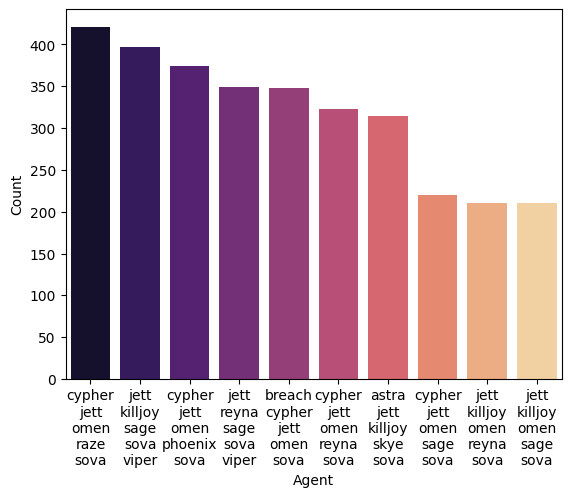

In [241]:
sns.barplot(x='Agent', y='Count', data=df_result_fixed[:10], palette='magma')